In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [3]:
example_digits = X_train[y_train==0,:][:10]
for num in range(1, 10):
    X_num = X_train[y_train==num,:][:10]
    example_digits = np.vstack([example_digits, X_num])

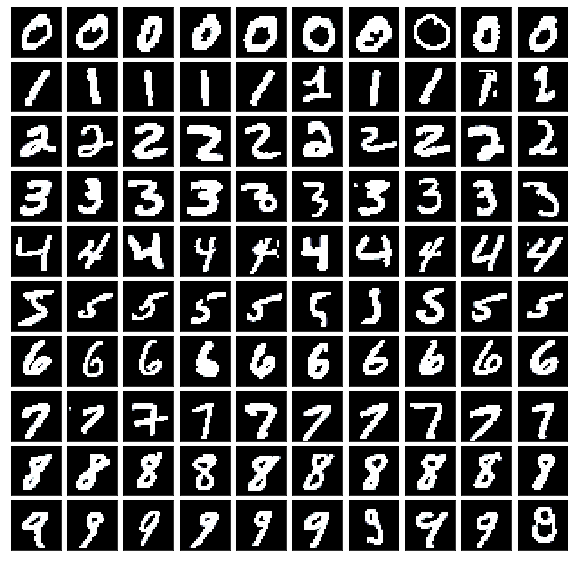

In [4]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i],
                  interpolation='nearest', cmap='bone', clim=(0, 16))
    plt.show()
    
plot_digits(example_digits)

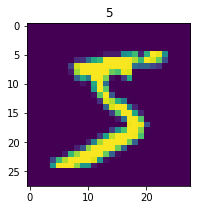

In [5]:
img1 = X_train[0]
fig1 = plt.figure(figsize=(3, 3))
plt.imshow(img1)
plt.title(y_train[0])
plt.show()

In [6]:
feature_size = img1.shape[0] * img1.shape[1]
X_train_format = X_train.reshape(X_train.shape[0], feature_size)
X_test_format = X_test.reshape(X_test.shape[0], feature_size)

print(X_train_format.shape)
print(X_test_format.shape)

(60000, 784)
(10000, 784)


### 数据归一化

In [7]:
X_train_normal = X_train_format / 255
X_test_normal = X_test_format / 255

In [9]:
from tensorflow.keras.utils import to_categorical

y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_test)

print(y_train_format[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 建立模型

In [11]:
from tensorflow.keras import  Sequential
from tensorflow.keras.layers import  Dense, Activation

mlp = Sequential()
mlp.add(Dense(units=392, activation='sigmoid', input_dim=feature_size))
mlp.add(Dense(units=392, activation='sigmoid'))
mlp.add(Dense(units=10, activation='softmax'))
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 392)               307720    
_________________________________________________________________
dense_1 (Dense)              (None, 392)               154056    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3930      
Total params: 465,706
Trainable params: 465,706
Non-trainable params: 0
_________________________________________________________________


### 配置模型

In [12]:
mlp.compile(optimizer='adam', loss='categorical_crossentropy')

### 训练模型

In [13]:
%%time
mlp.fit(X_train_normal, y_train_format, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3480
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1441
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0931
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0670
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0497
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0364
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0268
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0210
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0164
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0135
Wall time: 28.1 s


### 模型评估

In [16]:
y_train_predict = mlp.predict_classes(X_train_normal)
from sklearn.metrics import  accuracy_score
accuracy_train = accuracy_score(y_train, y_train_predict)
print(accuracy_train)

0.9974333333333333


In [17]:
y_test_predict = mlp.predict_classes(X_test_normal)
accuracy_test = accuracy_score(y_test, y_test_predict)
print(accuracy_test)

0.9811


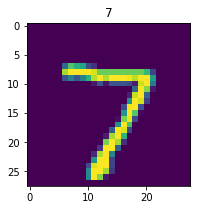

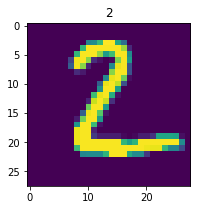

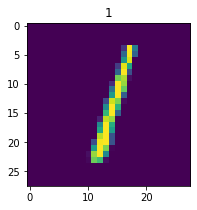

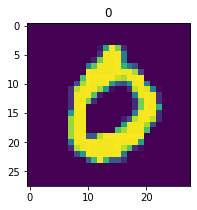

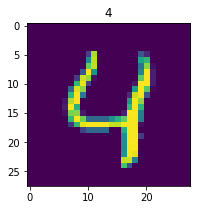

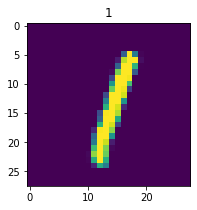

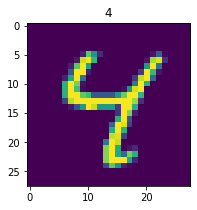

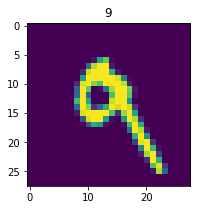

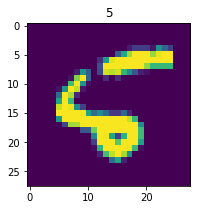

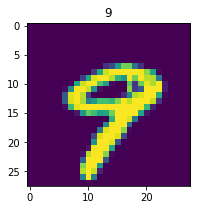

In [33]:
for i in range(10):
    img2 = X_test[i]
    fig2 = plt.figure(figsize=(3, 3))
    plt.imshow(img2)
    plt.title(y_test_predict[i])
    plt.show()